In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_folder = 'data/'

Reading processed data

In [4]:
categories = pd.read_csv(data_folder + 'cat1-label.csv')
df1 = pd.read_csv(data_folder + 'train-set-cat1-processed.csv')
df2 = pd.read_csv(data_folder + 'test-set-cat1-processed.csv')
df = pd.concat([df1, df2], ignore_index=True)

The dataframe has only 2 columns, text and label

The labels are 8

In [5]:
print(df.shape)
print(categories.shape)

(77208, 2)
(8, 2)


In [6]:
print(f"There are {len(df)} rows in the dataset processed.")
print(f"There are {len(categories)} categories in the dataset.")

There are 77208 rows in the dataset processed.
There are 8 categories in the dataset.


In [7]:
print(f"There are {sum(df['text'].str.split().apply(len).value_counts() == 1)} terms with occurrence as low as 1.")

There are 17 terms with occurrence as low as 1.


## 2-grams

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df['text'])
frequencies = sparse_matrix.sum(axis=0).T
df_bigrams = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency'])
df_bigrams.sort_values(by='frequency', ascending=False).head(20)

,frequency
paper present,2158
neural network,1997
monte carlo,1335
et al,1283
magnetic field,1236
differential equation,1210
result show,973
machine learning,969
cellular automaton,930
time series,908


## 3-grams

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df['text'])
frequencies = sparse_matrix.sum(axis=0).T
df_trigrams = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency'])
df_trigrams.sort_values(by='frequency', ascending=False).head(20)

,frequency
paper withdrawn author,458
monte carlo simulation,397
necessary sufficient condition,313
partial differential equation,306
convolutional neural network,301
deep neural network,277
phys rev lett,223
withdrawn author due,206
ordinary differential equation,206
stochastic differential equation,200


## tf-idf

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
word_vectorizer = TfidfVectorizer(ngram_range=(3,3), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df['text'])
tfidf = sparse_matrix.sum(axis=0).T
df_trigrams_tfidf = pd.DataFrame(tfidf, index=word_vectorizer.get_feature_names_out(), columns=['tfidf'])
df_trigrams_tfidf.sort_values(by='tfidf', ascending=False).head(20)

,tfidf
paper withdrawn author,70.674565
withdrawn author due,34.470755
necessary sufficient condition,30.983878
monte carlo simulation,29.879372
partial differential equation,25.601054
phys rev lett,25.412256
convolutional neural network,23.266272
deep neural network,21.725366
ordinary differential equation,18.148852
stochastic differential equation,17.805227


# Number of abstract x label

<Axes: xlabel='label', ylabel='Number of abstracts'>

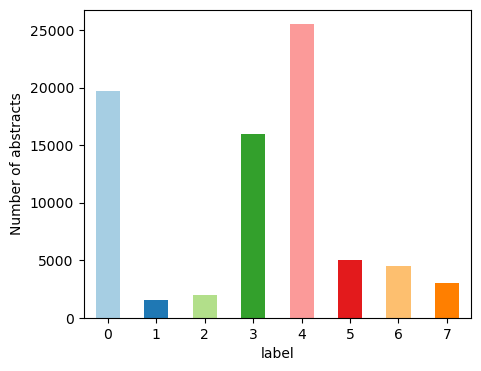

In [11]:
df.groupby(['label']).size().reset_index(name='counts').plot.bar(x='label',
                                                                 y='counts',
                                                                 figsize=(5,4),
                                                                 color=plt.cm.Paired(np.arange(len(df))),
                                                                 legend=False,
                                                                 ylabel = 'Number of abstracts',
                                                                 rot=0
                                                                 )

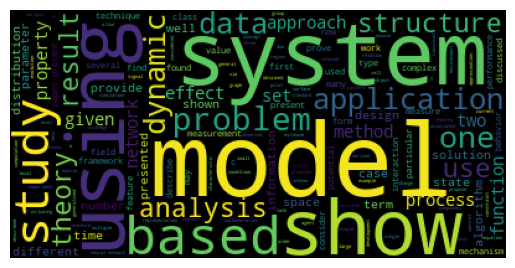

In [13]:
from wordcloud import WordCloud

wc_prova  = WordCloud().generate(' '.join(df['text']))
plt.imshow(wc_prova)
plt.axis("off")
plt.show()

# Number of terms x label

In [14]:
df_copy = df.copy()

Add column in each row with amount of word

In [15]:
df_copy['word_counts'] = df_copy['text'].str.count(' ') + 1

Group by label and sum the amount of rows

In [16]:
df_word_amount_label = df_copy.groupby(['label'])['word_counts'].sum().reset_index(name='counts')
df_word_amount_label

,label,counts
0,0,1096189
1,1,97194
2,2,134702
3,3,388183
4,4,1071892
5,5,374002
6,6,295877
7,7,154033


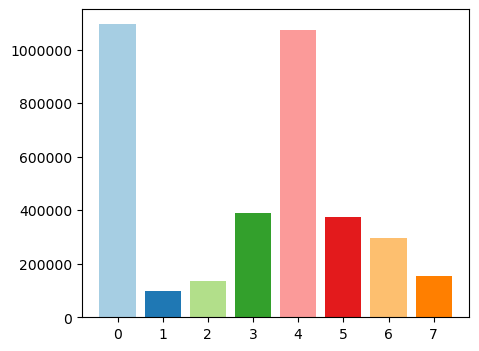

In [17]:
fig = plt.figure(figsize = (5, 4))
plt.bar(df_word_amount_label['label'],
        df_word_amount_label['counts'], 
        color = plt.cm.Paired(np.arange(len(df_word_amount_label))))
plt.ticklabel_format(style='plain')
plt.show()

On average how many words in a abstract per label

In [19]:
df_copy.groupby(['label'])['word_counts'].mean().reset_index(name='mean')

,label,mean
0,0,55.621524
1,1,64.796000
2,2,67.351000
3,3,24.261437
4,4,42.034980
5,5,74.800400
6,6,65.750444
7,7,51.344333
